### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [1]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import library modeling


import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

**Background**

California memiliki populasi tunawisma (homeless) terbesar di Amerika. Hal tersebut disebabkan oleh pasar rumah California yang mahal dan cepat berkembang. Biaya perumahan yang tinggi dan kurangnya rumah yang terjangkau menjadi masalah serius bagi keluarga berpenghasilan rendah dan individu berisiko menjadi tunawisma. Permintaan lapangan kerja yang kuat dan pertumbuhan pendapatan rumah tangga di California tidak diimbangi dengan pasokan rumah yang memadai. Spekulasi properti juga menjadi faktor yang meningkatkan harga rumah di wilayah ini.

**Problem Statement**

Biaya perumahan yang tinggi dan spekulasi properti menjadi penyebab utama masalah ini. Pemerintah perlu mengambil langkah-langkah efektif untuk memantau dan mengendalikan harga jual rumah, termasuk melalui analisis data untuk memprediksi harga perumahaan di California.

**Goals**

Memprediksi harga jual rumah di California agar dapat memberikan wawasan dan informasi yang lebih baik kepada pemerintah dalam menghadapi krisis perumahan dan harga rumah yang tinggi. Selain itu, juga membantu pemerintah dalam mengenali pola-pola kenaikan harga perumahan yang tidak wajar, sehingga dapat mengambil langkah-langkah untuk mencegah spekulasi properti yang berlebihan dan menjaga harga perumahan tetap terkendali dan stabil.

**Analytic Approach**

Jadi yang akan kita lakukan adalah menganalisis data historis tentang harga perumahan di California untuk menemukan pola-pola yang mempengaruhi kenaikan harga perumahan. Kemudian kita akan membangun model regresi yang dapat membantu dalam memprediksi harga perumahan di masa depan berdasarkan faktor-faktor yang relevan.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MAE dan RMSE. Nilai MAE yang lebih rendah menunjukkan bahwa model memiliki kesalahan prediksi yang lebih kecil, sedangkan untuk RMSE semakin rendah nilai RMSE semakin baik performa model dalam memprediksi harga rumah.

Selain itu, kita juga bisa menggunakan nilai R-squared. Nilai R-squared yang mendekati 1 menunjukkan bahwa model berhasil menjelaskan variasi harga dengan baik (hanya digunakan saat model linier)

### `Data Understanding`

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| longitude | A measure of how far west a house is; a more negative value is farther west |
| latitude | A measure of how far north a house is; a higher value is farther north |
| housing_median_age | Median age of a house within a block; a lower number is a newer building |
| total_rooms | Total number of rooms within a block |
| total_bedrooms | Total number of bedrooms within a block |
| population | Total number of people residing within a block |
| households | Total number of households, a group of people residing within a home unit, for a block |
| median_income | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| median_house_value | 	Median house value for households within a block (measured in US Dollars) |
| ocean_proximity | Location of the house with respect to the ocean/sea |

In [2]:
df = pd.read_csv("F:\Capstone-Project-3\Data\data_california_house.csv")
pd.set_option("display.max_columns", None)
display(df.head(), df.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


In [20]:
df.dropna(inplace=True)

In [17]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [22]:
len(df)

14311

In [23]:
df.housing_median_age.value_counts().head()

52.0    891
36.0    580
35.0    568
16.0    518
17.0    501
Name: housing_median_age, dtype: int64

#### **Initial Assesment**

In [3]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'min': df.min().values,
    'max': df.max().values,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (14448, 10)


,feature,data_type,null_value,min,max,n_unique,sample_unique
0,longitude,float64,0.000000,-124.35,-114.31,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0.000000,32.54,41.95,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0.000000,1.0,52.0,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0.000000,2.0,32627.0,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,0.948228,1.0,6445.0,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0.000000,3.0,35682.0,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0.000000,1.0,6082.0,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0.000000,0.4999,15.0001,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0.000000,<1H OCEAN,NEAR OCEAN,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0.000000,14999.0,500001.0,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


__Insight :__
* Dataset terdiri dari 10 kolom dan 14448 baris.
* Variabel numerik: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value
* Variabel categorical: ocean_proximity	
* Tipe data sudah sesuai
* Terdapat missing value pada fitur total_bedrooms sebesar 0.9%

#### **Numerical variable**

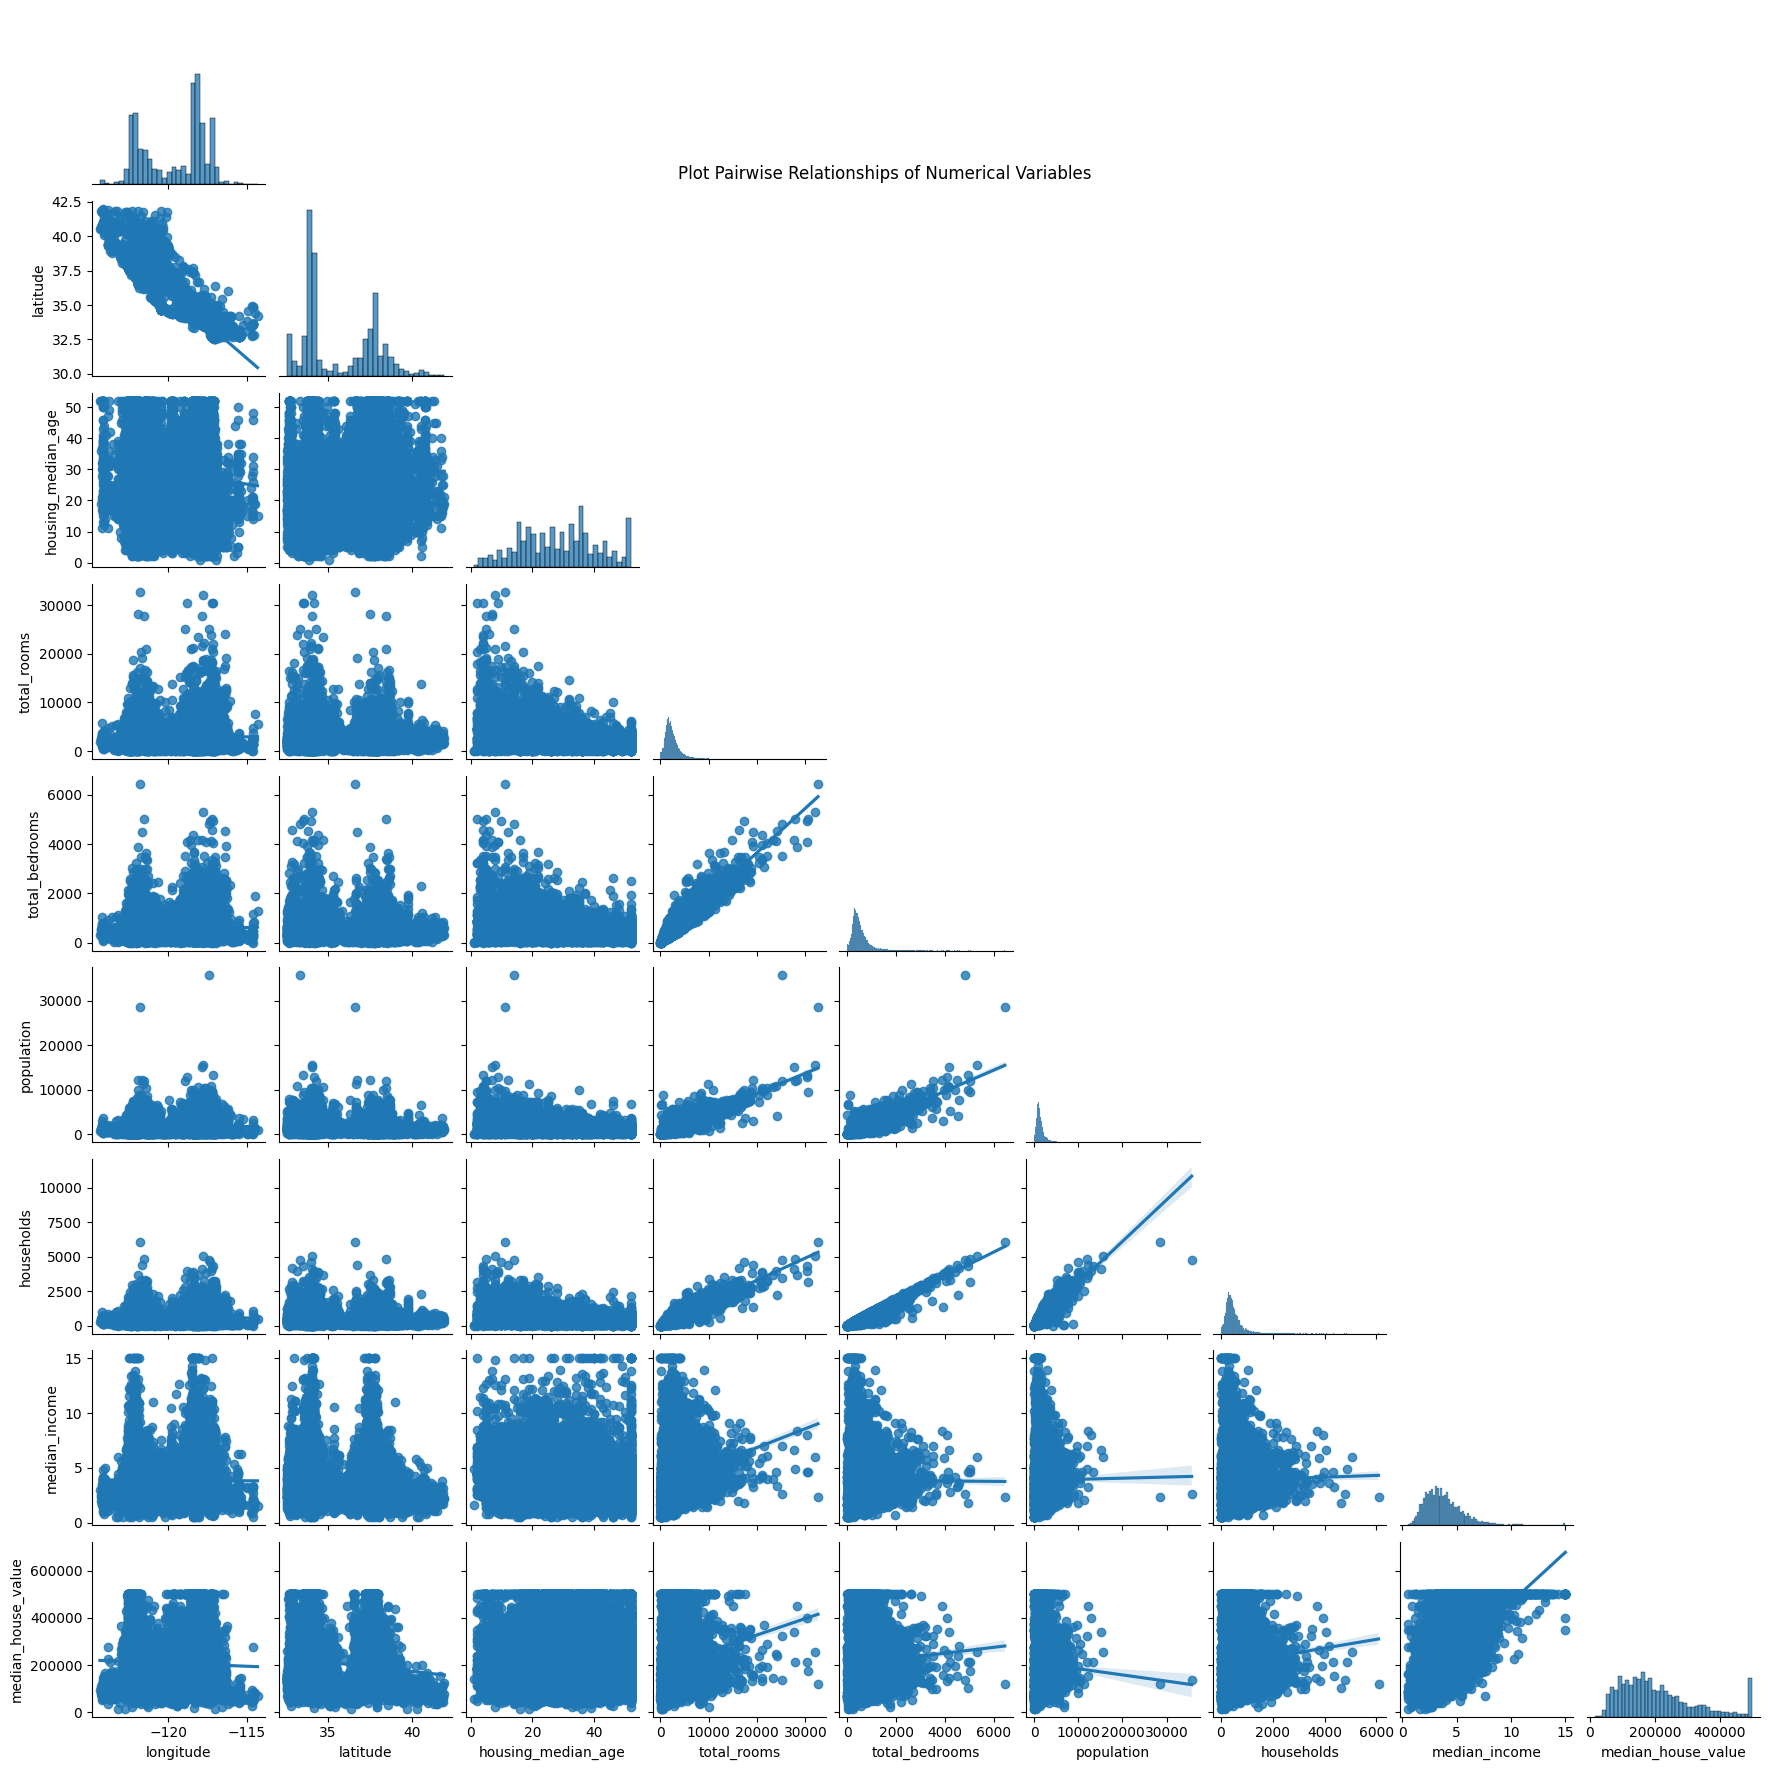

In [4]:
numerical = [var for var in df.columns if df[var].dtype != 'object']

graph = sns.pairplot(df[numerical], height=2.0, corner=True, kind='reg')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=0.9)
plt.show()

__Insight :__
* Distribusi data tergolong tidak normal
* Variabel pada dataset ini termasuk variabel continue
* Pada fitur median_house_value memilki beberapa outliers


#### **Categorical variable**

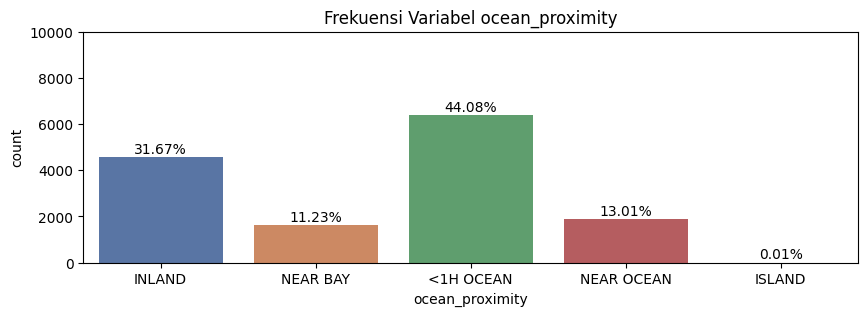

In [5]:
plt.subplots(figsize=(10, 3))
plt.title("Frekuensi Variabel ocean_proximity")
ax = sns.countplot(data=df, x="ocean_proximity", palette='deep')
ax.set_ylim([0, 10000])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

In [6]:
df.ocean_proximity.value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

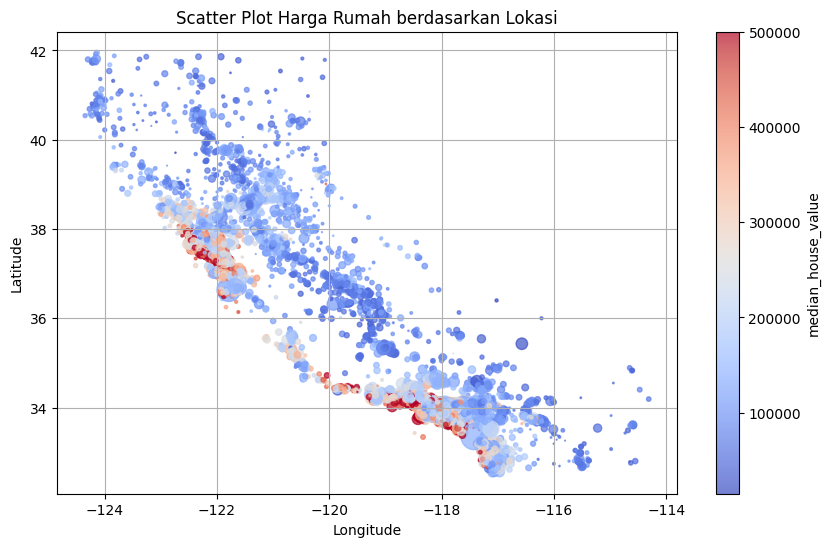

In [7]:
plt.figure(figsize=(10, 6))  # Atur ukuran gambar
plt.scatter(df.longitude, df.latitude, c=df.median_house_value, cmap='coolwarm', s=df.population/100, alpha=0.7)

#label sumbu dan judul
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Harga Rumah berdasarkan Lokasi')

#colorbar untuk menggambarkan skala harga rumah
colorbar = plt.colorbar()
colorbar.set_label('median_house_value')

plt.grid(True)  # Tampilkan grid
plt.show()      # Tampilkan plot


In [8]:
# Definisikan batas koordinat wilayah Los Angeles
batas_latitude_bawah = 33.7037
batas_latitude_atas = 34.3373
batas_longitude_barat = -118.6682
batas_longitude_timur = -118.1553

# Filter data rumah berdasarkan batas wilayah Los Angeles
data_rumah_los_angeles = df[
    (df['latitude'] >= batas_latitude_bawah) &
    (df['latitude'] <= batas_latitude_atas) &
    (df['longitude'] >= batas_longitude_barat) &
    (df['longitude'] <= batas_longitude_timur)
]
data_rumah_los_angeles.median_house_value.value_counts()

500001.0    255
187500.0     20
350000.0     20
175000.0     19
137500.0     19
           ... 
374500.0      1
495600.0      1
265900.0      1
384800.0      1
337600.0      1
Name: median_house_value, Length: 1544, dtype: int64

In [9]:
# Definisikan batas koordinat wilayah San Francisco
batas_latitude_bawah = 37.7081
batas_latitude_atas = 37.8332
batas_longitude_barat = -122.5149
batas_longitude_timur = -122.3572

# Filter data rumah berdasarkan batas wilayah San Francisco
data_rumah_san_francisco = df[
    (df['latitude'] >= batas_latitude_bawah) &
    (df['latitude'] <= batas_latitude_atas) &
    (df['longitude'] >= batas_longitude_barat) &
    (df['longitude'] <= batas_longitude_timur)
]

data_rumah_san_francisco.median_house_value.value_counts()

500001.0    67
350000.0    10
225000.0     9
275000.0     7
500000.0     6
            ..
281300.0     1
307100.0     1
337500.0     1
252000.0     1
230000.0     1
Name: median_house_value, Length: 258, dtype: int64

rumah dengan harga yang expensive terdapat pada poin yang berwarna merah yaitu di city San Fransisco dan Los Angels, untuk lokasinya berada di pinggir pantai.

__Insight :__
* ...
* ...
* ...

### `Data Preparation`

In [10]:
df = df.copy()
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10440,-117.29,34.11,35.0,2014.0,677.0,1714.0,612.0,0.7075,INLAND,78800.0
12825,-122.28,37.88,52.0,1909.0,416.0,811.0,406.0,3.0060,NEAR BAY,227900.0
13668,-118.64,34.22,16.0,4312.0,574.0,1902.0,574.0,8.4438,<1H OCEAN,390000.0
8240,-118.48,34.15,31.0,2536.0,429.0,990.0,424.0,5.4591,<1H OCEAN,495500.0
5867,-121.18,39.25,9.0,3415.0,562.0,1208.0,479.0,4.3646,INLAND,185900.0


#### **Data Wrangling**

**Missing Value**, .....

Deteksi dan kuantifikasi missing value:

<Axes: >

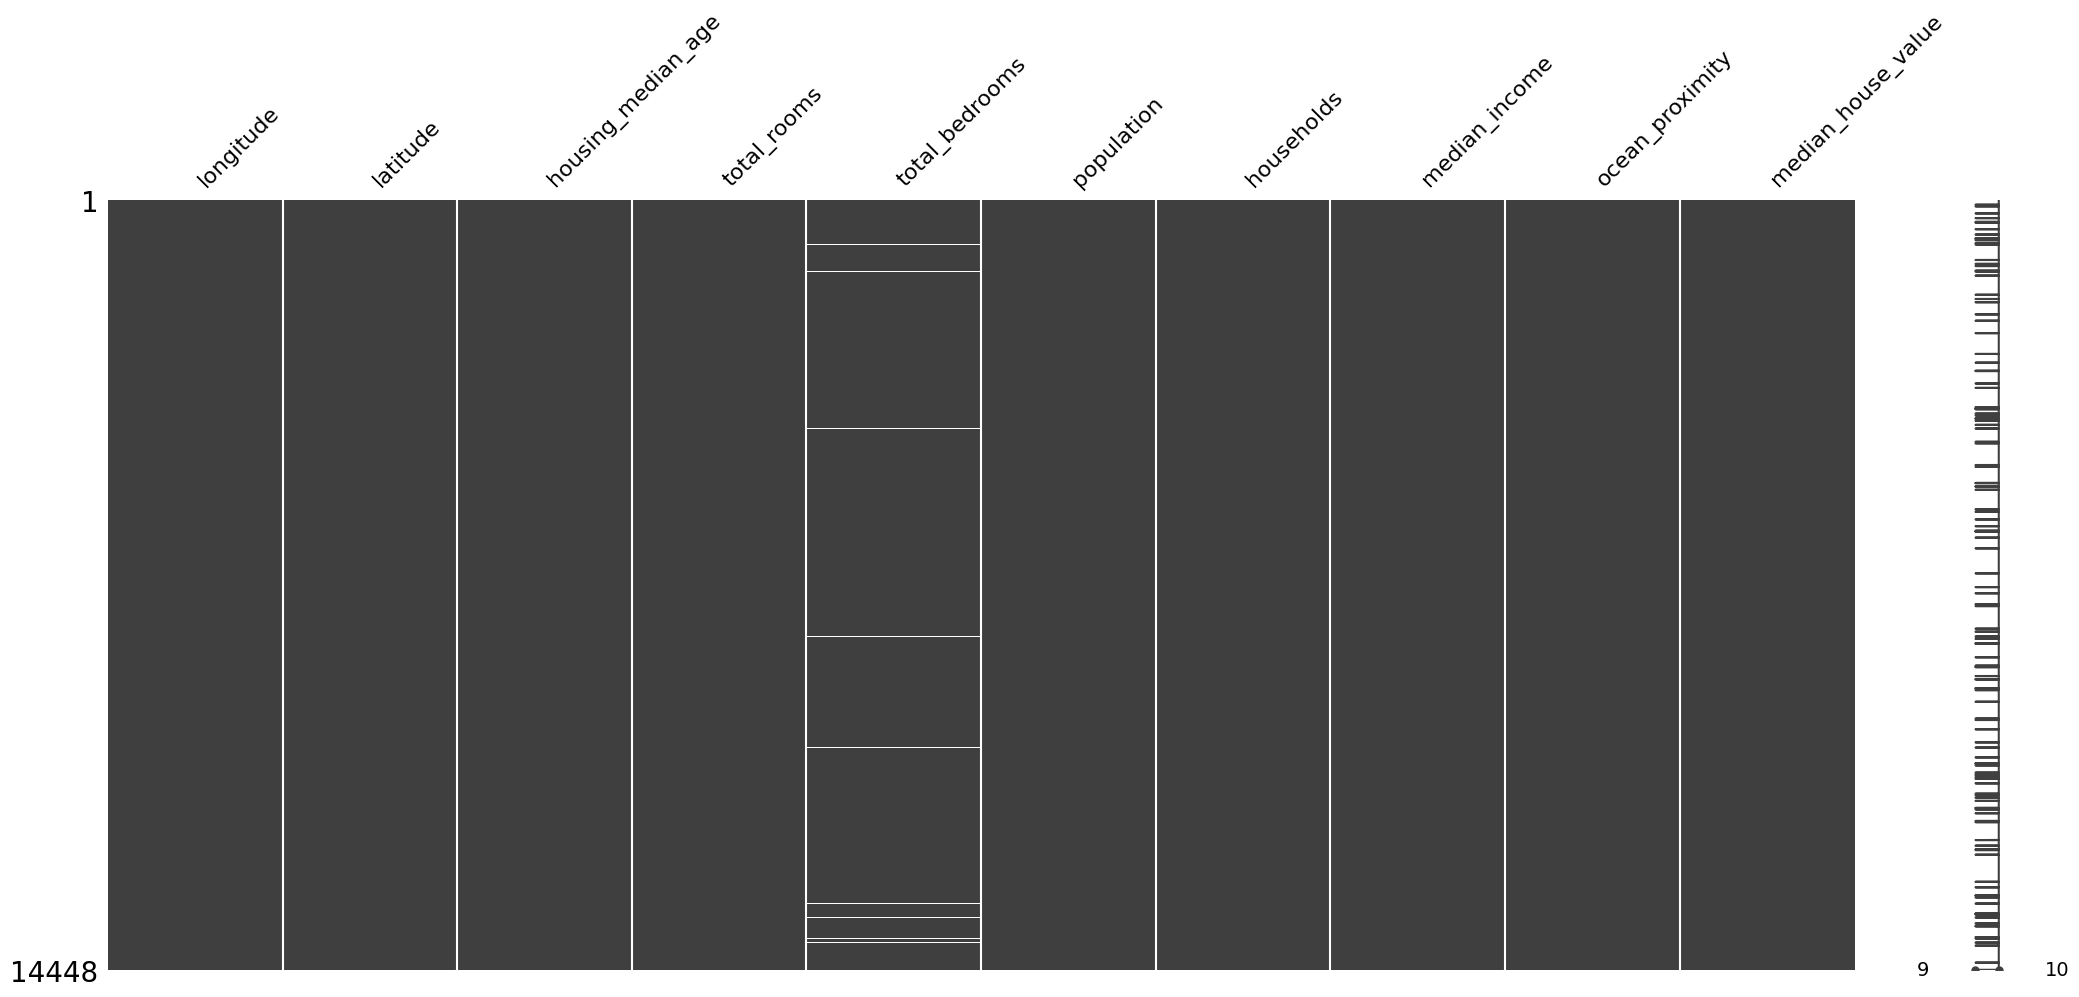

In [11]:
msno.matrix(df)

In [12]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
df[df.housing_median_age == 52]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
38,-121.95,37.28,52.0,777.0,148.0,362.0,144.0,4.0208,<1H OCEAN,262500.0
48,-122.43,37.71,52.0,1508.0,278.0,1138.0,304.0,4.0234,NEAR BAY,266500.0
50,-122.26,37.88,52.0,2363.0,604.0,1558.0,573.0,2.9440,NEAR BAY,338900.0
65,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY,261100.0
...,...,...,...,...,...,...,...,...,...,...
14331,-122.18,37.77,52.0,2744.0,547.0,1479.0,554.0,2.2768,NEAR BAY,96200.0
14353,-122.41,37.74,52.0,2058.0,399.0,1208.0,399.0,3.6429,NEAR BAY,230000.0
14378,-117.15,32.72,52.0,344.0,177.0,460.0,147.0,1.2292,NEAR OCEAN,137500.0
14424,-118.31,33.98,52.0,1837.0,426.0,1062.0,343.0,2.0000,<1H OCEAN,96500.0


In [14]:
df[df.median_house_value == 500001]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,13.0502,<1H OCEAN,500001.0
43,-122.21,37.37,34.0,1476.0,217.0,613.0,223.0,8.2883,NEAR OCEAN,500001.0
133,-122.44,37.80,52.0,3257.0,735.0,1045.0,620.0,4.5523,NEAR BAY,500001.0
201,-122.42,37.80,52.0,4079.0,1112.0,1466.0,1024.0,4.5913,NEAR BAY,500001.0
236,-121.89,37.46,5.0,1519.0,186.0,705.0,186.0,10.3798,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
14325,-118.44,34.07,26.0,3535.0,748.0,1322.0,666.0,7.1674,<1H OCEAN,500001.0
14328,-118.46,34.06,46.0,1302.0,215.0,482.0,226.0,7.0674,<1H OCEAN,500001.0
14371,-122.02,37.29,18.0,2550.0,312.0,999.0,320.0,8.7939,<1H OCEAN,500001.0
14377,-118.46,34.08,35.0,3247.0,525.0,1065.0,484.0,7.8426,<1H OCEAN,500001.0


Handling missing value:

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler


__Insight :__ 
* ....
* ....
* ....

**Rare label**, .....

Deteksi dan kuantifikasi rare value:

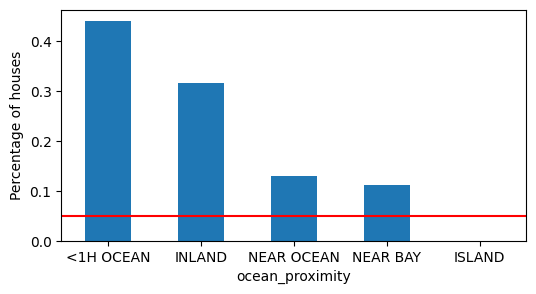

In [16]:
temp_df = pd.Series(df['ocean_proximity'].value_counts() / len(df))

plt.figure(figsize=(6, 3))
fig = temp_df.sort_values(ascending=False).plot.bar(rot=0)
fig.set_xlabel('ocean_proximity')

fig.axhline(y=0.05, color='red')
fig.set_ylabel('Percentage of houses')
plt.show()

Handling rare value:

__Insight :__ 
* ....
* ....
* ....

**Outlier,** .....

Deteksi dan kuantifikasi outlier:

Handling outlier:

__Insight :__
* ....
* ....
* ....

#### **Feature Engineering**

Bagi dataset menjadi train set dan test set:

Proses scaling dan encoding:

Feature Creation:

Feature Selection:

### `Modeling`

**Model Experiment**

Bandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model:

Lakukan optimasi model benchmark:

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

**Model Intepretation**

* .....
* .....
* .....

**Model Limitation**

* .....
* .....
* .....


### `Conclusion`

Beberapa hal yang dapat disimpulkan yaitu:

* ....
* ....
* ....

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

* ....
* ....
* ....